### Semana 07 - lec 01 - Teste de Hipótese


#### Teste de Hipótese

  - distribuições e amostragens
  - distância entre distribuições - tamanho do efeito
  - distribuição chi-quadrado, t-student e normal (gaussiana)
  - qual a diferença entre as distribuições t-student, normal e Z?
  - o que é teste de hipótese?
      - chi-quadrado
      - t-student
      - revisitando: p-value, intervalo de confiança, tamanho de efeito
      - como monstar um barplot com barras de erros?
      - como calcular o n amostral mínimo
  - casos e exercícios
          - chi-quadrado
          - t-student
  - outros testes importantes:
          - teste de múltiplas comparações - Anova - análise variança (Ronald Fisher)
          - teste de Tukey (todos grupos entre si)
          - teste de Dunnett (todos grupos contra um único controle)
          - teste de Normalidade (Shapiro-Wilk)
          - Kolmogorov-Smirnov (comparando-se duas distribuições quaisquer)
  - testes não paramétricos:
          - exemplo em estudos clínicos de Vacina

#### Biblioteca scipy.stats

  - https://docs.scipy.org/doc/scipy/reference/stats.html
  

#### Esta lição:

  - distribuições e amostragens
  - distância entre distribuições - tamanho do efeito
  - distribuição chi-quadrado, t-student e normal (gaussiana)

In [116]:
import os, sys, math
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt # matplotlib e seu alias plt
from matplotlib import gridspec
%matplotlib inline

### Bernoulli

In [2]:
from scipy.stats import bernoulli

pis = [.2, .5, .8]
for p in pis:
    mu, var, skew, kurt = bernoulli.stats(p, moments='mvsk')
    std = np.sqrt(var)
    print("p = %.1f mean = %.3f, std = %.3f, var = %.3f, skew = %.3f, kurt = %.3f"%(p, mu, std, var, skew, kurt) )

p = 0.2 mean = 0.200, std = 0.400, var = 0.160, skew = 1.500, kurt = 0.250
p = 0.5 mean = 0.500, std = 0.500, var = 0.250, skew = 0.000, kurt = -2.000
p = 0.8 mean = 0.800, std = 0.400, var = 0.160, skew = -1.500, kurt = 0.250


  - Variance: é chamado o segundo momento
  - Skewness: é o terceiro momento  mdede a distorção da simetria
    - se o valor está entre -0.5 e +0.5 é dita simétrica
    - se o valor está abaixo de -0.5 está enviesada para a direita 
    - se o valor está acima  de +0.5 está enviesada para a esquerda
  - Kurtosis: é o quarto momento
    - tem a haver com outliers e o "rabo da distribuição"
    - se a kurtose é grade é porque a distribuição tem um "rabo longo"
    
veja:  
https://codeburst.io/2-important-statistics-terms-you-need-to-know-in-data-science-skewness-and-kurtosis-388fef94eeaa  
https://brownmath.com/stat/shape.htm

### Distribuição Binomial (discreta, várias moedas - sim/não, cara/coroa)

In [3]:
coins = 2  # número de moedas
pis = [0.2, 0.5, 0.8]
N = 1000

j0 = np.random.binomial(coins, pis[0], N)
j1 = np.random.binomial(coins, pis[1], N)
j2 = np.random.binomial(coins, pis[2], N)

df = pd.DataFrame([j0, j1, j2]).T
df.columns=['p0', 'p1', 'p2']
df.head(3)

,p0,p1,p2
0,0,1,2
1,0,2,2
2,1,1,1


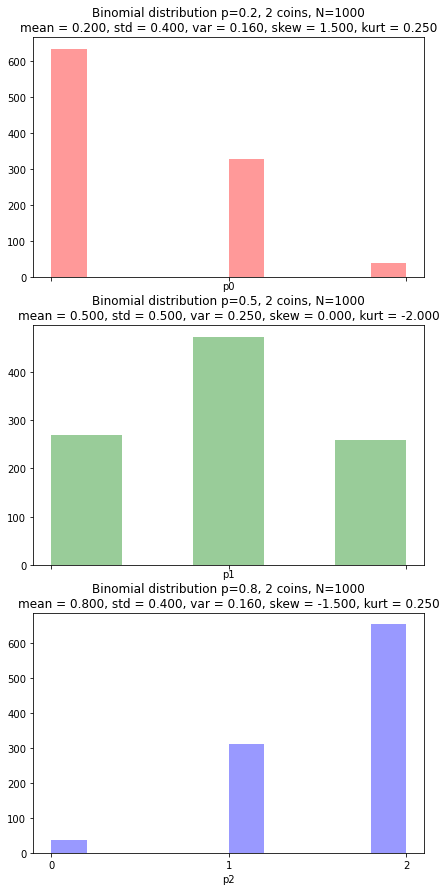

In [4]:
f, axes = plt.subplots(3, 1, figsize=(7, 15), sharex=True)

sns.distplot(df.p0, kde=False, color='red',   ax=axes[0])
p = pis[0]
title = 'Binomial distribution p=%.1f, %d coins, N=%d'%(p, coins, N)
mu, var, skew, kurt = bernoulli.stats(p, moments='mvsk'); std = np.sqrt(var)
title += "\nmean = %.3f, std = %.3f, var = %.3f, skew = %.3f, kurt = %.3f"%(mu, std, var, skew, kurt)
axes[0].set_title(title)

sns.distplot(df.p1, kde=False, color='green', ax=axes[1])
p = pis[1]
title = 'Binomial distribution p=%.1f, %d coins, N=%d'%(p, coins, N)
mu, var, skew, kurt = bernoulli.stats(p, moments='mvsk'); std = np.sqrt(var)
title += "\nmean = %.3f, std = %.3f, var = %.3f, skew = %.3f, kurt = %.3f"%(mu, std, var, skew, kurt)
axes[1].set_title(title)

sns.distplot(df.p2, kde=False, color='blue',  ax=axes[2]);
p = pis[2]
title = 'Binomial distribution p=%.1f, %d coins, N=%d'%(p, coins, N)
mu, var, skew, kurt = bernoulli.stats(p, moments='mvsk'); std = np.sqrt(var)
title += "\nmean = %.3f, std = %.3f, var = %.3f, skew = %.3f, kurt = %.3f"%(mu, std, var, skew, kurt)
axes[2].set_title(title);
axes[2].set_xticks([0,1,2]);

### O que tem de errado no código???
### Para que repetir tudo? Crie uma função

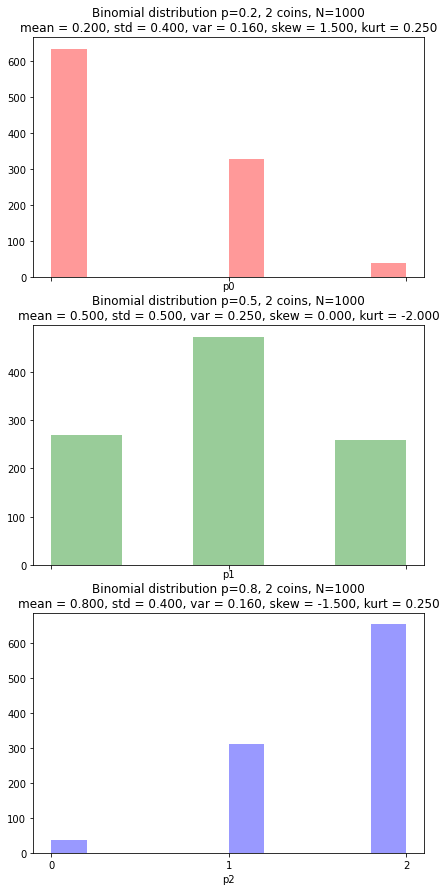

In [5]:
## Repare que pis, coins, e N são 'variáveis globais'

def calc_params_title(p):
    p = pis[i]
    title = 'Binomial distribution p=%.1f, %d coins, N=%d'%(p, coins, N)
    mu, var, skew, kurt = bernoulli.stats(p, moments='mvsk'); std = np.sqrt(var)
    title += "\nmean = %.3f, std = %.3f, var = %.3f, skew = %.3f, kurt = %.3f"%(mu, std, var, skew, kurt)
    return title

colors = ['red', 'green', 'blue']
f, axes = plt.subplots(3, 1, figsize=(7, 15), sharex=True)

for i in range(3):
    sns.distplot(df['p%d'%i], kde=False, color=colors[i], ax=axes[i])
    axes[i].set_title(calc_params_title(pis[i]))
    axes[i].set_xticks([0,1,2]);

### Distribuição Poisson (discreta, eventos raros)

In [6]:
mus = [0.2, 1, 3]
N = 1000

j0 = np.random.poisson(mus[0], N)
j1 = np.random.poisson(mus[1], N)
j2 = np.random.poisson(mus[2], N)

df = pd.DataFrame([j0, j1, j2]).T
df.columns=['p0', 'p1', 'p2']
df.head(3)

,p0,p1,p2
0,0,2,0
1,0,0,3
2,0,3,4


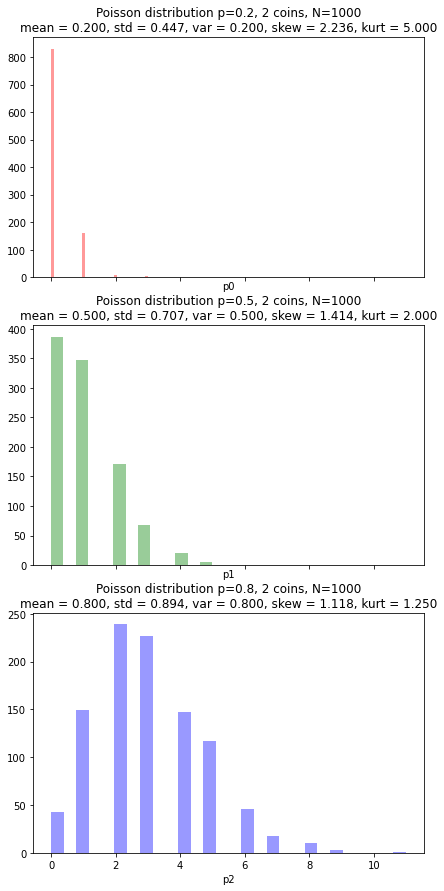

In [7]:
from scipy.stats import poisson

def calc_params_title(p):
    p = pis[i]
    title = 'Poisson distribution p=%.1f, %d coins, N=%d'%(p, coins, N)
    mu, var, skew, kurt = poisson.stats(p, moments='mvsk'); std = np.sqrt(var)
    title += "\nmean = %.3f, std = %.3f, var = %.3f, skew = %.3f, kurt = %.3f"%(mu, std, var, skew, kurt)
    return title

colors = ['red', 'green', 'blue']
f, axes = plt.subplots(3, 1, figsize=(7, 15), sharex=True)

for i in range(3):
    sns.distplot(df['p%d'%i], kde=False, color=colors[i], ax=axes[i])
    axes[i].set_title(calc_params_title(pis[i]))

### Distribuição Normal (contínua)

In [8]:
mus = [0.2, 1, 3]
sds = [.5, 0.5, 0.5]
N = 1000

j0 = np.random.normal(mus[0], sds[0], N)
j1 = np.random.normal(mus[1], sds[1], N)
j2 = np.random.normal(mus[2], sds[2], N)

df = pd.DataFrame([j0, j1, j2]).T
df.columns=['p0', 'p1', 'p2']
df.head(3)

,p0,p1,p2
0,0.036562,1.227050,3.050152
1,0.517822,1.443743,2.190844
2,-0.107170,0.527843,2.331328


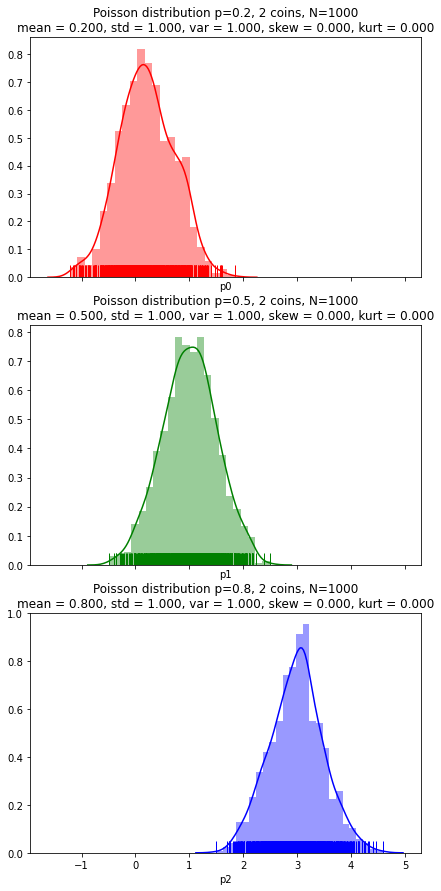

In [9]:
from scipy.stats import norm

def calc_params_title(p):
    p = pis[i]
    title = 'Poisson distribution p=%.1f, %d coins, N=%d'%(p, coins, N)
    mu, var, skew, kurt = norm.stats(p, moments='mvsk'); std = np.sqrt(var)
    title += "\nmean = %.3f, std = %.3f, var = %.3f, skew = %.3f, kurt = %.3f"%(mu, std, var, skew, kurt)
    return title

colors = ['red', 'green', 'blue']
f, axes = plt.subplots(3, 1, figsize=(7, 15), sharex=True)

for i in range(3):
    sns.distplot(df['p%d'%i], color=colors[i], ax=axes[i], hist=True, kde=True, rug=True)
    axes[i].set_title(calc_params_title(pis[i]))

### distplot completo

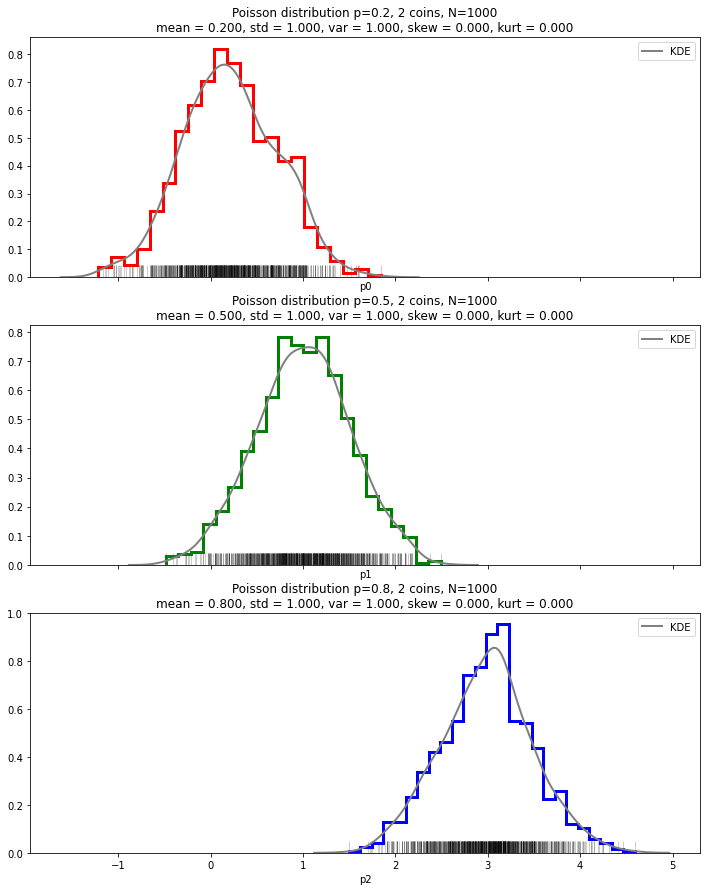

In [10]:
from scipy.stats import norm

def calc_params_title(p):
    p = pis[i]
    title = 'Poisson distribution p=%.1f, %d coins, N=%d'%(p, coins, N)
    mu, var, skew, kurt = norm.stats(p, moments='mvsk'); std = np.sqrt(var)
    title += "\nmean = %.3f, std = %.3f, var = %.3f, skew = %.3f, kurt = %.3f"%(mu, std, var, skew, kurt)
    return title

colors = ['red', 'green', 'blue']
f, axes = plt.subplots(3, 1, figsize=(12, 15), sharex=True)

for i in range(3):
    sns.distplot(df['p%d'%i], ax=axes[i], hist=True, kde=True, rug=True,
                 rug_kws={"color": "black", "alpha": .2,},
                 kde_kws={"color": "gray", "lw": 2, "label": "KDE"},
                 hist_kws={"histtype": "step", "linewidth": 3, "alpha": 1, "color": colors[i]})
    
    axes[i].set_title(calc_params_title(pis[i]))

### Distância entre distribuições

In [11]:
from scipy.stats import norm

mus = [1, 3]
sds = [0.3, 0.8]
N = 1000

j0 = np.random.normal(mus[0], sds[0], N)
j1 = np.random.normal(mus[1], sds[1], N)

df = pd.DataFrame([j0, j1]).T
df.columns=['dist1', 'dist2']
df.head(3)

,dist1,dist2
0,0.943091,3.181619
1,0.773671,2.307119
2,1.152121,3.882685


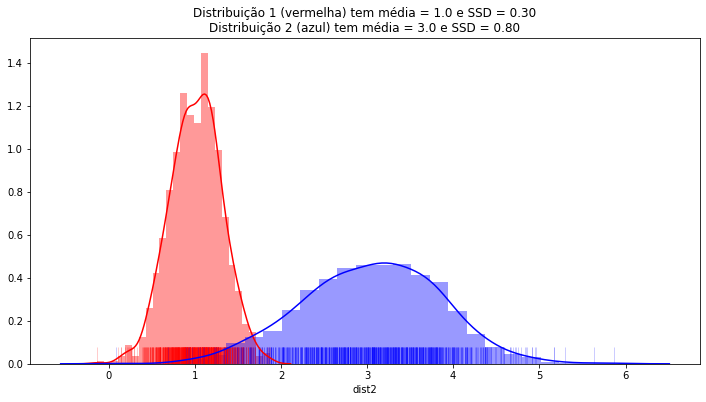

In [12]:
colors = ['red', 'blue']
fig = plt.figure(figsize=(12, 6))

for i in range(2):
    sns.distplot(df['dist%d'%(i+1)], color=colors[i], hist=True, kde=True, rug=True,
                rug_kws={"color": colors[i], "alpha": .2,})

mu1 = df.dist1.mean()
sd1 = df.dist1.std()

mu2 = df.dist2.mean()
sd2 = df.dist2.std()

    
title  =   "Distribuição 1 (vermelha) tem média = %.1f e SSD = %.2f"%(mu1, sd1)
title += "\nDistribuição 2 (azul) tem média = %.1f e SSD = %.2f"%(mu2, sd2)
plt.title(title);

In [13]:
seqxs = []
seqx1 = np.linspace(stats.norm.ppf(0.01, mus[0], sds[0]), stats.norm.ppf(0.99, mus[0], sds[0]), 100)
seqxs.append(seqx1)
seqx1[:5], seqx1[-10:-1]

(array([0.30209564, 0.31619472, 0.33029379, 0.34439287, 0.35849195]),
 array([1.57101266, 1.58511174, 1.59921082, 1.61330989, 1.62740897,
        1.64150805, 1.65560713, 1.66970621, 1.68380528]))

In [14]:
seqx2 = np.linspace(stats.norm.ppf(0.01, mus[1], sds[1]), stats.norm.ppf(0.99, mus[1], sds[1]), 100)
seqxs.append(seqx2)
seqx2[:5], seqx2[-10:-1]

(array([1.1389217 , 1.17651924, 1.21411678, 1.25171432, 1.28931187]),
 array([4.52270043, 4.56029797, 4.59789551, 4.63549305, 4.67309059,
        4.71068813, 4.74828568, 4.78588322, 4.82348076]))

### Teste t

detalhes na próxima lição

In [65]:
sta, pval = stats.ttest_ind(df.dist1, df.dist2)
sta, pval

alpha=0.05

#text_stat = "t-test statistics = %.2f, p-val = %.2e"%(sta, pval)
text_stat = "estatística t-test = %.2f, p-val = %.2e"%(sta, pval)

if pval < alpha:
    # text_stat = 'Statiscally distinct, H0 must be refuted ' + text_stat
    text_stat = 'Distribuições estatiscamente diferentes, H0 precisa ser refutado\n' + text_stat
else:
    #text_stat = 'Statiscally similar, H0 must be accepetd ' + text_stat
    text_stat = 'Distribuições estatiscamente similar, H0 precisa ser aceito\n' + text_stat

text_stat    

'Distribuições estatiscamente diferentes, H0 precisa ser refutado\nestatística t-test = -75.15, p-val = 0.00e+00'

### Coeficiente de variação

<font size="5">$CV = \frac{SD}{mu}$</font>

### Tamanho do efeito (effect size)

https://en.wikipedia.org/wiki/Effect_size

<font size="5">$\theta = \frac{\mu_1 -\mu_2}{SD}$</font>

### Markdown

https://csrgxtu.github.io/2015/03/20/Writing-Mathematic-Fomulars-in-Markdown/ 
    
https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Typesetting%20Equations.html
    

### Revendo o gráfico com todas as estatísticas

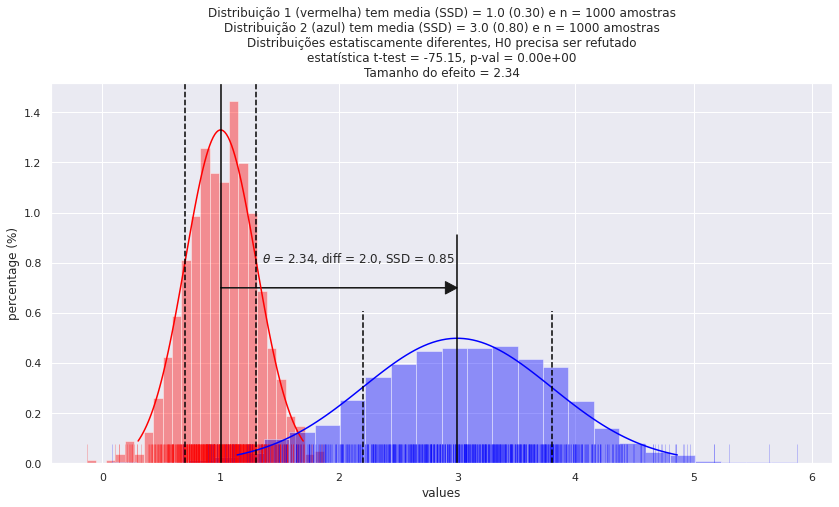

In [67]:
colors = ['red', 'blue']
fig = plt.figure(figsize=(14, 7))

for i in range(2):
    sns.distplot(df['dist%d'%(i+1)], color=colors[i], kde=False, rug=True, norm_hist=True,
                rug_kws={"color": colors[i], "alpha": .2,})
    
    sns.lineplot(seqxs[i], stats.norm.pdf(seqxs[i], mus[i], sds[i]), color=colors[i])

mu1 = df.dist1.mean()
sd1 = df.dist1.std()

mu2 = df.dist2.mean()
sd2 = df.dist2.std()

plt.axvline(x=mus[0], ymin=0, ymax=1.4, color='black')
plt.axvline(x=mus[0]+sds[0], ymin=0, ymax=1.0, color='black', linestyle='--')
plt.axvline(x=mus[0]-sds[0], ymin=0, ymax=1.0, color='black', linestyle='--')

plt.axvline(x=mus[1], ymin=0, ymax=.6, color='black')
plt.axvline(x=mus[1]+sds[1], ymin=0, ymax=.4, color='black', linestyle='--')
plt.axvline(x=mus[1]-sds[1], ymin=0, ymax=.4, color='black', linestyle='--')

head_width = 0.05

# nsamp = N*sqrt(sds[0]**2/n**2 + sds[1]**2/n**2)
SSD = np.sqrt(sds[0]**2 + sds[1]**2)
EffSize = (mus[1] - mus[0]) / SSD

diff = mus[1]-mus[0]
xdiff = mus[1] - (diff/2)
yarrow = 0.7

plt.arrow(mus[0], yarrow, (diff-2*head_width), 0, head_width=head_width, head_length=0.1, fc='k', ec='k')

text = '$\\theta$ = %.2f, diff = %.1f, SSD = %.2f'%(EffSize, diff, SSD)
plt.text(x=(xdiff-.65), y=(yarrow+.1), s=text)
plt.xlabel("values")
plt.ylabel("percentage (%)")
     
title  =   "Distribuição 1 (vermelha) tem media (SSD) = %.1f (%.2f) e n = %d amostras"%(mu1, sd1, N)
title += "\nDistribuição 2 (azul) tem media (SSD) = %.1f (%.2f) e n = %d amostras"%(mu2, sd2, N)
title += '\n' + text_stat + '\nTamanho do efeito = %.2f'%(EffSize)
plt.title(title);

In [81]:
df2 = pd.DataFrame(df.dist1)
df2['class'] = 'um'
df2.columns = ['val', 'class']

dfa = pd.DataFrame(df.dist2)
dfa['class'] = 'dois'
dfa.columns = ['val', 'class']

# df2 = pd.concat([df2, dfa])
df2 = df2.append(dfa)
df2.tail(3)

,val,class
997,2.615023,dois
998,3.525788,dois
999,3.025388,dois


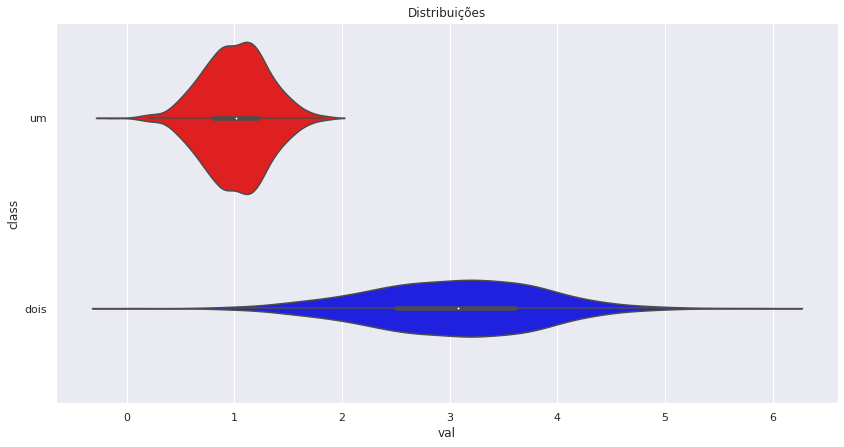

In [100]:
fig = plt.figure(figsize=(14, 7))
#sns.set(rc={"figure.figsize": (6,4)})
sns.violinplot(x="val", y="class", data=df2, palette=['red', 'blue']) # , saturation=.05)
plt.title("Distribuições");

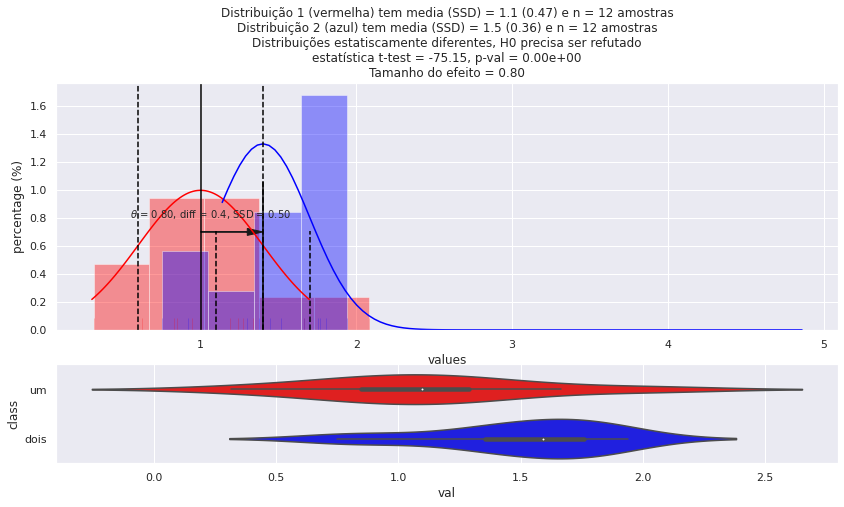

In [146]:
from matplotlib import gridspec

# f, axes = plt.subplots(2, 1, figsize=(14, 16), sharex=True)

colors = ['red', 'blue']
fig = plt.figure(figsize=(14, 7))
gs = gridspec.GridSpec(2, 1, height_ratios=[5, 2])

axes = []
axes.append(plt.subplot(gs[0]))
axes.append(plt.subplot(gs[1]))


for i in range(2):
    sns.distplot(df['dist%d'%(i+1)], color=colors[i], kde=False, rug=True, norm_hist=True,
                rug_kws={"color": colors[i], "alpha": .2,}, ax=axes[0])
    
    sns.lineplot(seqxs[i], stats.norm.pdf(seqxs[i], mus[i], sds[i]), color=colors[i], ax=axes[0])

mu1 = df.dist1.mean()
sd1 = df.dist1.std()

mu2 = df.dist2.mean()
sd2 = df.dist2.std()

axes[0].axvline(x=mus[0], ymin=0, ymax=1.4, color='black')
axes[0].axvline(x=mus[0]+sds[0], ymin=0, ymax=1.0, color='black', linestyle='--')
axes[0].axvline(x=mus[0]-sds[0], ymin=0, ymax=1.0, color='black', linestyle='--')

axes[0].axvline(x=mus[1], ymin=0, ymax=.6, color='black')
axes[0].axvline(x=mus[1]+sds[1], ymin=0, ymax=.4, color='black', linestyle='--')
axes[0].axvline(x=mus[1]-sds[1], ymin=0, ymax=.4, color='black', linestyle='--')

head_width = 0.05

# nsamp = N*sqrt(sds[0]**2/n**2 + sds[1]**2/n**2)
SSD = np.sqrt(sds[0]**2 + sds[1]**2)
EffSize = (mus[1] - mus[0]) / SSD

diff = mus[1]-mus[0]
xdiff = mus[1] - (diff/2)
yarrow = 0.7

axes[0].arrow(mus[0], yarrow, (diff-2*head_width), 0, head_width=head_width, head_length=0.1, fc='k', ec='k')

text = '$\\theta$ = %.2f, diff = %.1f, SSD = %.2f'%(EffSize, diff, SSD)
axes[0].text(x=(xdiff-.65), y=(yarrow+.1), s=text)
axes[0].set_xlabel("values")
axes[0].set_ylabel("percentage (%)")
     
title  =   "Distribuição 1 (vermelha) tem media (SSD) = %.1f (%.2f) e n = %d amostras"%(mu1, sd1, N)
title += "\nDistribuição 2 (azul) tem media (SSD) = %.1f (%.2f) e n = %d amostras"%(mu2, sd2, N)
title += '\n' + text_stat + '\nTamanho do efeito = %.2f'%(EffSize)
axes[0].set_title(title);

df2 = pd.DataFrame(df.dist1)
df2['class'] = 'um'
df2.columns = ['val', 'class']

dfa = pd.DataFrame(df.dist2)
dfa['class'] = 'dois'
dfa.columns = ['val', 'class']

# df2 = pd.concat([df2, dfa])
df2 = df2.append(dfa)

sns.violinplot(x="val", y="class", data=df2, palette=['red', 'blue'], ax=axes[1]); # , saturation=.05)

In [147]:
def plot_2_distributions(df, xlim, alpha=0.05):

    colors = ['red', 'blue']
    fig = plt.figure(figsize=(14, 7))
    gs = gridspec.GridSpec(2, 1, height_ratios=[5, 2]) 

    axes = []
    axes.append(plt.subplot(gs[0]))
    axes.append(plt.subplot(gs[1]))


    for i in range(2):
        sns.distplot(df['dist%d'%(i+1)], color=colors[i], kde=False, rug=True, norm_hist=True,
                    rug_kws={"color": colors[i], "alpha": .2,}, ax=axes[0])

        sns.lineplot(seqxs[i], stats.norm.pdf(seqxs[i], mus[i], sds[i]), color=colors[i], ax=axes[0])

        
    #----------- statistics --------------------
    #-- ttest
    
    sta, pval = stats.ttest_ind(df.dist1, df.dist2)
    #text_stat = "t-test statistics = %.2f, p-val = %.2e"%(sta, pval)
    text_stat = "estatística t-test = %.2f, p-val = %.2e"%(sta, pval)

    if pval < alpha:
        # text_stat = 'Statiscally distinct, H0 must be refuted ' + text_stat
        text_stat = 'Distribuições estatiscamente diferentes, H0 precisa ser refutado\n' + text_stat
    else:
        #text_stat = 'Statiscally similar, H0 must be accepetd ' + text_stat
        text_stat = 'Distribuições estatiscamente similar, H0 precisa ser aceito\n' + text_stat
    
    #-- params
    mu1 = df.dist1.mean()
    sd1 = df.dist1.std()

    mu2 = df.dist2.mean()
    sd2 = df.dist2.std()

    axes[0].axvline(x=mus[0], ymin=0, ymax=1.4, color='black')
    axes[0].axvline(x=mus[0]+sds[0], ymin=0, ymax=1.0, color='black', linestyle='--')
    axes[0].axvline(x=mus[0]-sds[0], ymin=0, ymax=1.0, color='black', linestyle='--')

    axes[0].axvline(x=mus[1], ymin=0, ymax=.6, color='black')
    axes[0].axvline(x=mus[1]+sds[1], ymin=0, ymax=.4, color='black', linestyle='--')
    axes[0].axvline(x=mus[1]-sds[1], ymin=0, ymax=.4, color='black', linestyle='--')

    head_width = 0.05

    # nsamp = N*sqrt(sds[0]**2/n**2 + sds[1]**2/n**2)
    SSD = np.sqrt(sds[0]**2 + sds[1]**2)
    EffSize = (mus[1] - mus[0]) / SSD

    diff = mus[1]-mus[0]
    xdiff = mus[1] - (diff/2)
    yarrow = 0.7

    # axes[0].arrow(mus[0], yarrow, (diff-2*head_width), 0, head_width=head_width, head_length=0.1, fc='k', ec='k')

    text = '$\\theta$ = %.2f, diff = %.1f, SSD = %.2f'%(EffSize, diff, SSD)
    # axes[0].text(x=(xdiff-.65), y=(yarrow+.1), s=text)
    axes[0].set_xlabel("values")
    axes[0].set_ylabel("percentage (%)")
    axes[0].set_xlim(xlim);

    title  =   "Distribuição 1 (vermelha) tem media (SSD) = %.1f (%.2f) e n = %d amostras"%(mu1, sd1, N)
    title += "\nDistribuição 2 (azul) tem media (SSD) = %.1f (%.2f) e n = %d amostras"%(mu2, sd2, N)
    title += '\n' + text_stat + '\nTamanho do efeito = %.2f, distância = %.1f, SSDtot = %.2f'%(EffSize, diff, SSD)
    axes[0].set_title(title);
    
    #--- concat dist1, dist2
    df2 = pd.DataFrame(df.dist1)
    df2['class'] = 'um'
    df2.columns = ['val', 'class']

    dfa = pd.DataFrame(df.dist2)
    dfa['class'] = 'dois'
    dfa.columns = ['val', 'class']

    # df2 = pd.concat([df2, dfa])
    df2 = df2.append(dfa)


    sns.violinplot(x="val", y="class", data=df2, palette=['red', 'blue'], ax=axes[1]); # , saturation=.05)
    axes[1].set_xlim(xlim);

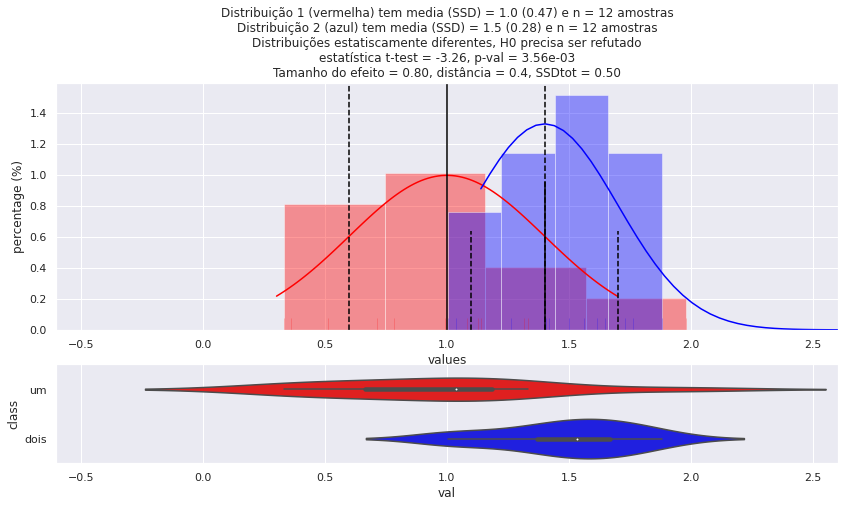

In [148]:
from scipy.stats import norm

mus = [1, 1.4]
sds = [0.4, 0.3]
xlim = [mus[0]-4*sds[0], mus[1]+4*sds[1]]
N = 12

j0 = np.random.normal(mus[0], sds[0], N)
j1 = np.random.normal(mus[1], sds[1], N)

df = pd.DataFrame([j0, j1]).T
df.columns=['dist1', 'dist2']

plot_2_distributions(df, xlim)